In [26]:
#To work with data frames & arrays
import pandas as pd
import numpy as np

#Visualization & Analysis
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import scipy.stats as st

#Preprocessing
from sklearn.feature_selection import RFE
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import *
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import LocalOutlierFactor





#Models Evaluation
from scipy.stats import ttest_rel
from scipy.stats import pearsonr
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import time
from sklearn.metrics import classification_report , roc_curve, f1_score, accuracy_score, recall_score , roc_auc_score


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import confusion_matrix,mean_squared_error,precision_score,recall_score,f1_score ,classification_report
!pip install modAL
from modAL.models import ActiveLearner
from sklearn import metrics
from modAL.uncertainty import uncertainty_sampling,margin_sampling,entropy_sampling

import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df2 = df.copy()

In [10]:
df2 = df2.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [11]:
df2.HasCrCard = df2.HasCrCard.map({0: 'No CreditCard', 1: 'Has CreditCard'})
df2.IsActiveMember = df2.IsActiveMember.map({0: 'Inactive', 1: 'Active'})
df2.Exited = df2.Exited.map({0: 'Stayed', 1: 'Exited'})
df2.rename(columns={'Exited':'Status'},inplace = True)
df2.rename(columns={'HasCrCard':'CreditCard'},inplace = True)
df2.rename(columns={'IsActiveMember':'Activity'},inplace = True)

In [12]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,CreditCard,Activity,EstimatedSalary,Status
0,619,France,Female,42,2,0.00,1,Has CreditCard,Active,101348.88,Exited
1,608,Spain,Female,41,1,83807.86,1,No CreditCard,Active,112542.58,Stayed
2,502,France,Female,42,8,159660.80,3,Has CreditCard,Inactive,113931.57,Exited
3,699,France,Female,39,1,0.00,2,No CreditCard,Inactive,93826.63,Stayed
4,850,Spain,Female,43,2,125510.82,1,Has CreditCard,Active,79084.10,Stayed


<Axes: xlabel='Activity', ylabel='count'>

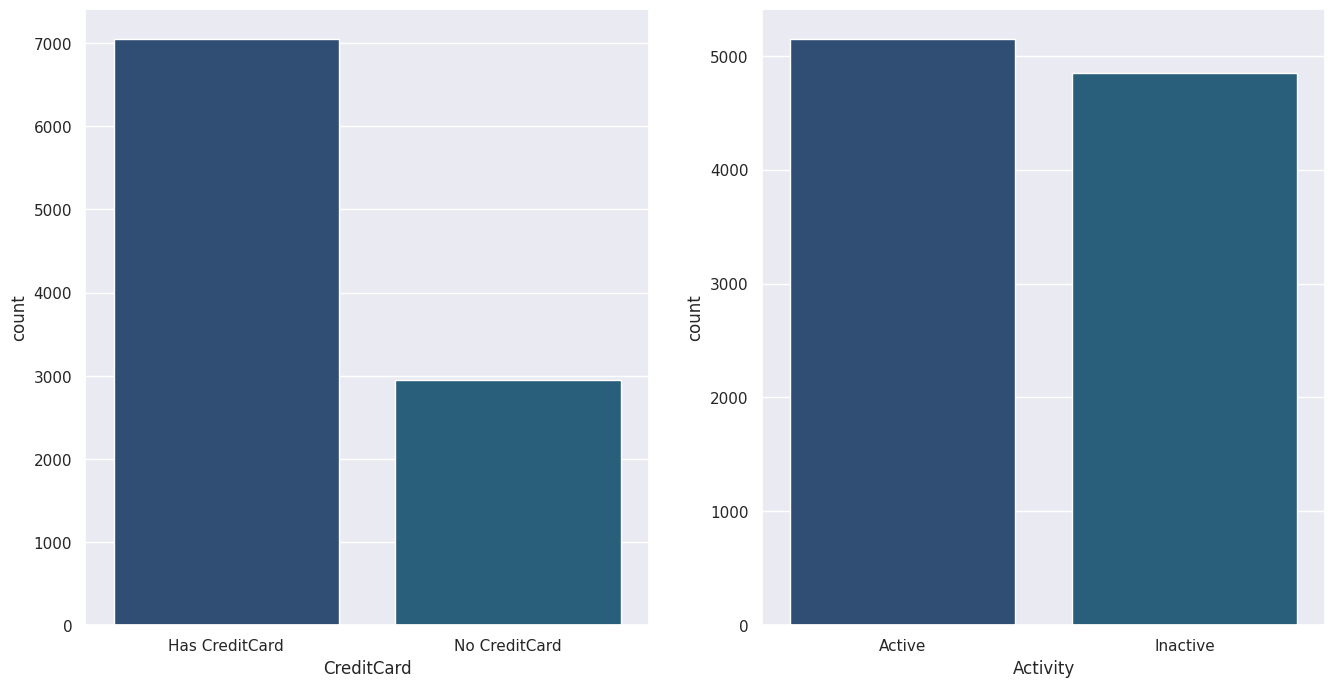

In [13]:
sns.set(rc={'figure.figsize':(16,8)})
fig,axs = plt.subplots(1,2)
sns.set_theme(palette="crest_r")
sns.countplot(data = df2,x = "CreditCard",ax=axs[0])
sns.countplot(data = df2,x = "Activity",ax=axs[1])

In [14]:
labels = ['Exited','Stayed']
values = [df2.Status[df2['Status']=='Exited'].count(),df2.Status[df2['Status']=='Stayed'].count()]

# pull is given as a fraction of the pie radius
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0])])
fig.update_layout(title='Status')
fig.show()

In [15]:
# Correlations among columns
corr=df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004187,0.005130,0.000476,-0.006934,-0.009013,0.008305,0.000599,0.012044,-0.006007,-0.016571
CustomerId,0.004187,1.000000,0.005967,0.008775,-0.015072,-0.013932,0.019297,-0.014023,0.001682,0.015246,-0.006264
CreditScore,0.005130,0.005967,1.000000,-0.007974,0.001133,0.005687,0.012568,-0.003802,0.024262,0.001237,-0.023289
Age,0.000476,0.008775,-0.007974,1.000000,-0.010405,0.033304,-0.058566,-0.015278,0.039839,-0.002431,0.323968
Tenure,-0.006934,-0.015072,0.001133,-0.010405,1.000000,-0.009513,0.012908,0.022354,-0.028673,0.007778,-0.013978
Balance,-0.009013,-0.013932,0.005687,0.033304,-0.009513,1.000000,-0.316627,-0.009835,-0.011497,0.011778,0.111110
NumOfProducts,0.008305,0.019297,0.012568,-0.058566,0.012908,-0.316627,1.000000,0.003859,0.016292,0.012570,-0.125282
HasCrCard,0.000599,-0.014023,-0.003802,-0.015278,0.022354,-0.009835,0.003859,1.000000,-0.011866,-0.010041,-0.007138
IsActiveMember,0.012044,0.001682,0.024262,0.039839,-0.028673,-0.011497,0.016292,-0.011866,1.000000,-0.011469,-0.156128
EstimatedSalary,-0.006007,0.015246,0.001237,-0.002431,0.007778,0.011778,0.012570,-0.010041,-0.011469,1.000000,0.012081


In [16]:
data = df.drop(["RowNumber", "CustomerId", "Surname"], axis=1)

In [17]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [18]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

In [19]:
from sklearn.preprocessing import LabelBinarizer
jobs_encoder = LabelBinarizer()
jobs_encoder.fit(data["Geography"])
transformed = jobs_encoder.transform(data["Geography"])
ohe_df = pd.DataFrame(transformed)
data = pd.concat([data, ohe_df], axis=1).drop(["Geography"], axis=1)

In [20]:
data.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,0,1,2
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


In [21]:
X = data.drop(['Exited'],axis=1)
Y = data.Exited

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Gender           10000 non-null  int64  
 2   Age              10000 non-null  int64  
 3   Tenure           10000 non-null  int64  
 4   Balance          10000 non-null  float64
 5   NumOfProducts    10000 non-null  int64  
 6   HasCrCard        10000 non-null  int64  
 7   IsActiveMember   10000 non-null  int64  
 8   EstimatedSalary  10000 non-null  float64
 9   0                10000 non-null  int64  
 10  1                10000 non-null  int64  
 11  2                10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [22]:
class1 = Y[Y==1].count()
class2 = Y[Y==0].count()
print(class1)
print(class2)

2037
7963


In [35]:
X_train, X_test, y_train, y_test  =  train_test_split(np.array(X),np.array(Y),random_state=42,test_size=0.960,shuffle=True)

In [29]:
def get_accuracy(name, trained_model , x_train, y_train, x_test, y_test):
    tree_predict = trained_model.predict(x_test)
    print("Testing accuracy   :",metrics.accuracy_score(y_test, tree_predict)*100 , "%")
    print("MSE [TEST]          :",mean_squared_error(y_test, tree_predict))


    tree_predict1 = trained_model.predict(x_train)
    print("Training accuracy  :",metrics.accuracy_score(y_train, tree_predict1)*100 ,"%")
    print("MSE [TRAIN]         :",mean_squared_error(y_train, tree_predict1))

    print("precision : ",precision_score(y_test, tree_predict,average='micro'))
    print("recall    : ",recall_score(y_test, tree_predict,average='micro'))
    print("f1_score  : ",f1_score(y_test, tree_predict,average='micro'))


    cf1 = confusion_matrix(y_test,tree_predict)
    sns.heatmap(cf1,annot=True,fmt = '.0f')
    plt.xlabel('prediction')
    plt.ylabel('Actual')
    plt.title(name+ ' Confusion Matrix')
    plt.show()

    print(classification_report(y_train,  trained_model.predict(x_train)))
    print(classification_report(y_test,  trained_model.predict(x_test)))

# **Uncertainty Sampling**

In [36]:
# Train an initial machine learning model

# Set up the active learning model using Uncertainty Sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=uncertainty_sampling,
    X_training=np.array(X_train), y_training=np.array(y_train)
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 78.97%


Testing accuracy   : 78.96875 %
MSE [TEST]          : 0.2103125
Training accuracy  : 79.75 %
MSE [TRAIN]         : 0.2025
precision :  0.7896875
recall    :  0.7896875
f1_score  :  0.7896875


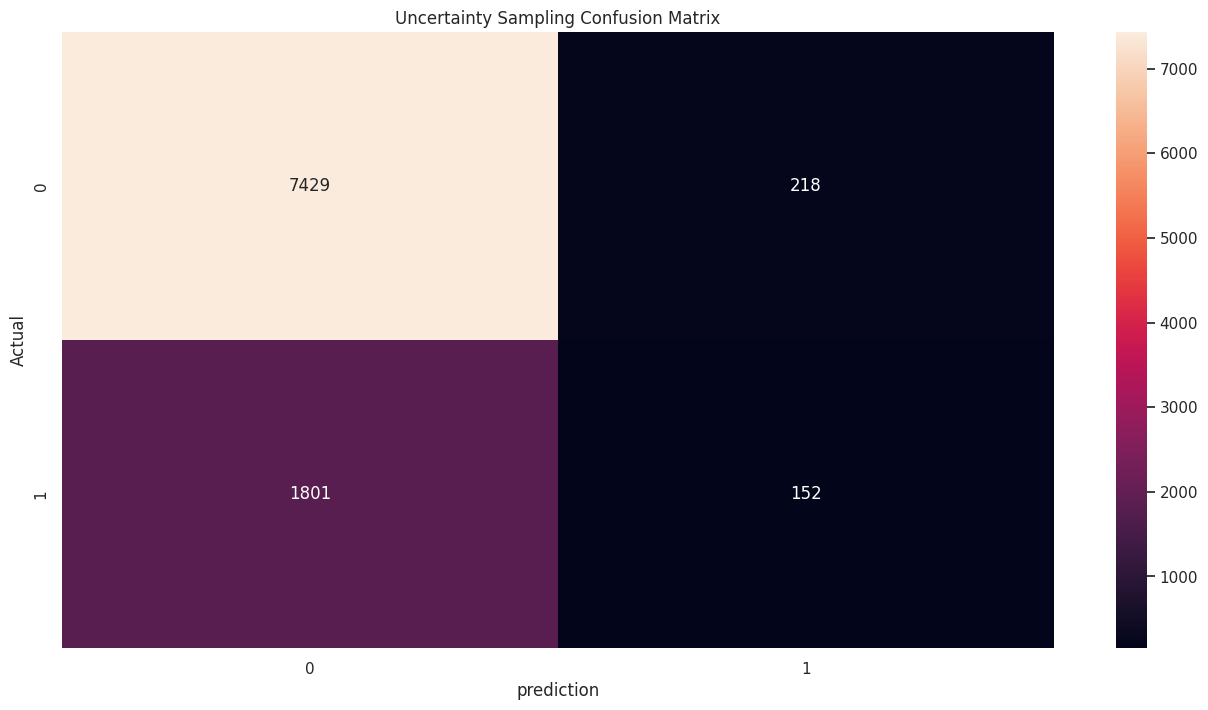

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       316
           1       0.60      0.11      0.18        84

    accuracy                           0.80       400
   macro avg       0.70      0.54      0.53       400
weighted avg       0.76      0.80      0.74       400

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7647
           1       0.41      0.08      0.13      1953

    accuracy                           0.79      9600
   macro avg       0.61      0.52      0.51      9600
weighted avg       0.72      0.79      0.73      9600



In [37]:
get_accuracy('Uncertainty Sampling',learner,  X_train, y_train, X_test, y_test )

# **margin sampling**

In [38]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using margin_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=margin_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 78.97%


Testing accuracy   : 78.96875 %
MSE [TEST]          : 0.2103125
Training accuracy  : 79.75 %
MSE [TRAIN]         : 0.2025
precision :  0.7896875
recall    :  0.7896875
f1_score  :  0.7896875


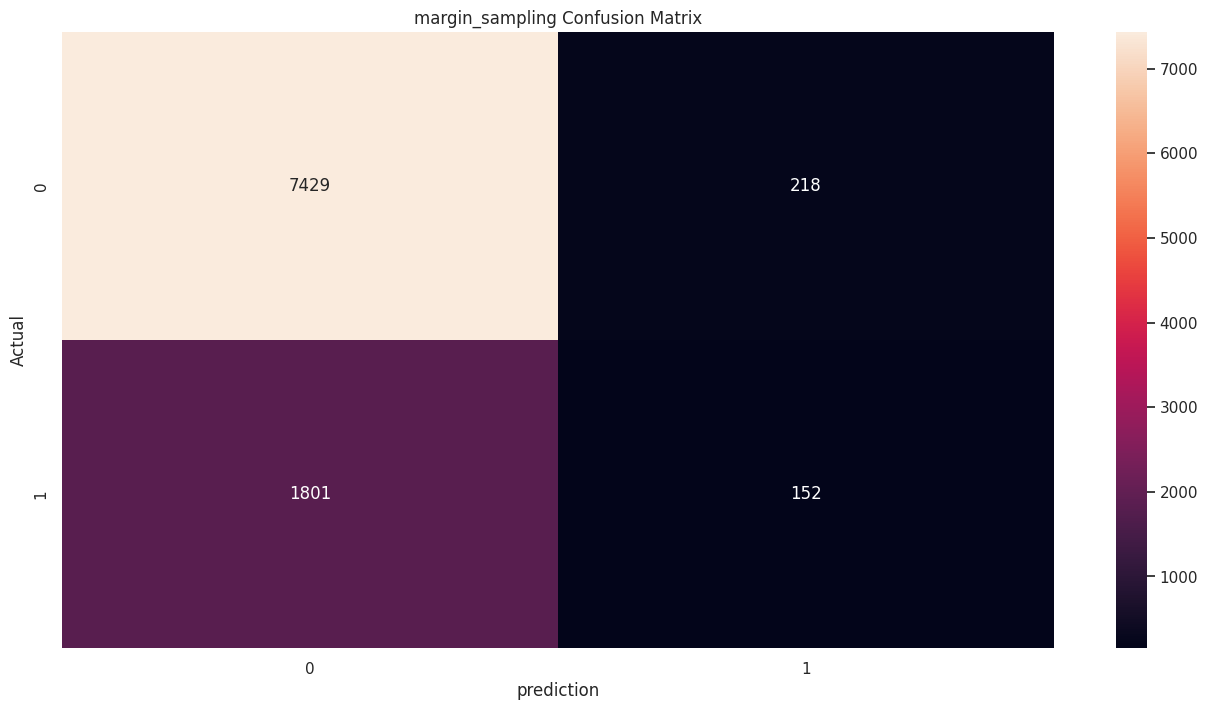

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       316
           1       0.60      0.11      0.18        84

    accuracy                           0.80       400
   macro avg       0.70      0.54      0.53       400
weighted avg       0.76      0.80      0.74       400

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7647
           1       0.41      0.08      0.13      1953

    accuracy                           0.79      9600
   macro avg       0.61      0.52      0.51      9600
weighted avg       0.72      0.79      0.73      9600



In [39]:
get_accuracy('margin_sampling',learner,  X_train, y_train, X_test, y_test )

# **entropy sampling**

In [40]:
# Train an initial machine learning model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Set up the active learning model using entropy_sampling
learner = ActiveLearner(
    estimator=LogisticRegression(max_iter=1000),
    query_strategy=entropy_sampling,
    X_training=X_train, y_training=y_train
)

# Select the most informative data points for labeling
n_queries = 100
for i in range(n_queries):
    query_idx, query_instance = learner.query(X_test)
    y_new = y_test[query_idx]
    learner.teach(query_instance, y_new)

# Evaluate the performance of the final model on the test set
y_pred = learner.predict(X_test)
accuracy = np.sum(y_pred == y_test) / len(y_test)
print('Accuracy: %.2f%%' % (accuracy * 100))

Accuracy: 78.97%


Testing accuracy   : 78.96875 %
MSE [TEST]          : 0.2103125
Training accuracy  : 79.75 %
MSE [TRAIN]         : 0.2025
precision :  0.7896875
recall    :  0.7896875
f1_score  :  0.7896875


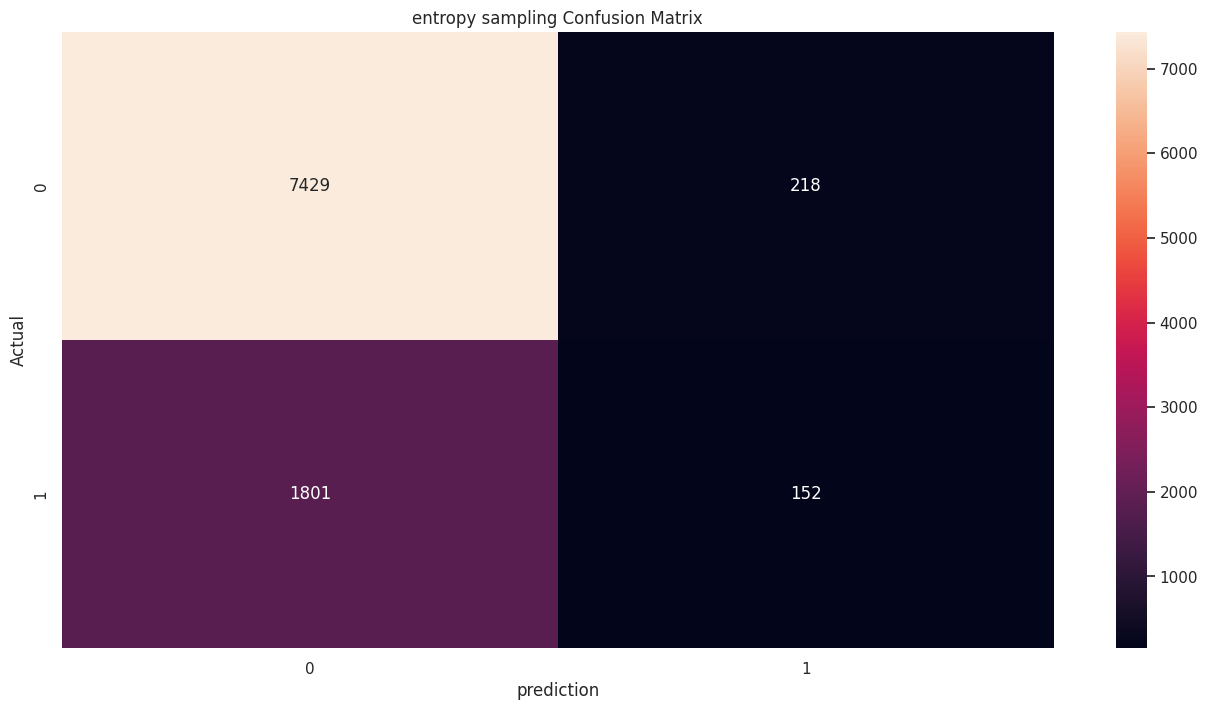

              precision    recall  f1-score   support

           0       0.81      0.98      0.88       316
           1       0.60      0.11      0.18        84

    accuracy                           0.80       400
   macro avg       0.70      0.54      0.53       400
weighted avg       0.76      0.80      0.74       400

              precision    recall  f1-score   support

           0       0.80      0.97      0.88      7647
           1       0.41      0.08      0.13      1953

    accuracy                           0.79      9600
   macro avg       0.61      0.52      0.51      9600
weighted avg       0.72      0.79      0.73      9600



In [41]:
get_accuracy('entropy sampling',learner,  X_train, y_train, X_test, y_test )

# **random**

In [42]:
X_train, X_test, y_train, y_test  =  train_test_split(np.array(X),np.array(Y),random_state=42,train_size=(0.04+100/X.shape[0]),shuffle=True)





Testing accuracy   : 78.84210526315789 %
MSE [TEST]          : 0.21157894736842106
Training accuracy  : 79.80000000000001 %
MSE [TRAIN]         : 0.202
precision :  0.7884210526315789
recall    :  0.7884210526315789
f1_score  :  0.7884210526315789


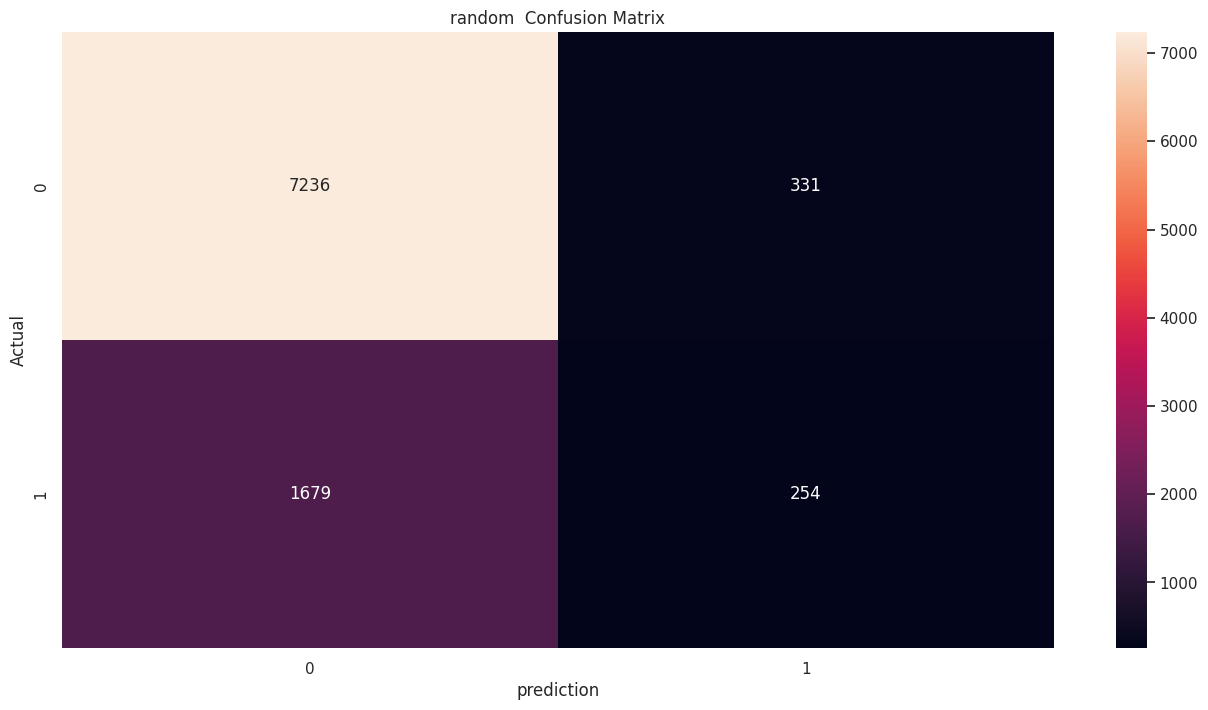

              precision    recall  f1-score   support

           0       0.81      0.97      0.88       396
           1       0.56      0.14      0.23       104

    accuracy                           0.80       500
   macro avg       0.68      0.56      0.56       500
weighted avg       0.76      0.80      0.75       500

              precision    recall  f1-score   support

           0       0.81      0.96      0.88      7567
           1       0.43      0.13      0.20      1933

    accuracy                           0.79      9500
   macro avg       0.62      0.54      0.54      9500
weighted avg       0.73      0.79      0.74      9500



In [43]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
get_accuracy('random ',model,  X_train, y_train, X_test, y_test )